In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


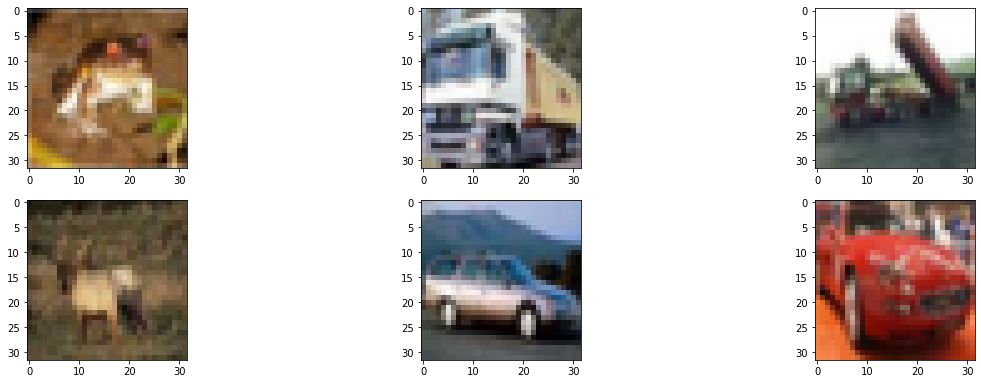

In [5]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(train_X[i])
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [0]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')

train_X=train_X/255.0
test_X=test_X/255.0

In [0]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)

num_classes=test_Y.shape[1]

In [0]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
padding='same',activation='relu',
kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

In [13]:
model.fit(train_X,train_Y,
validation_data=(test_X,test_Y),
epochs=10,batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 211s 4ms/step - loss: 1.6807 - accuracy: 0.3939 - val_loss: 1.3306 - val_accuracy: 0.5330
Epoch 2/10
50000/50000 [==============================] - 210s 4ms/step - loss: 1.2949 - accuracy: 0.5356 - val_loss: 1.1631 - val_accuracy: 0.5858
Epoch 3/10
50000/50000 [==============================] - 211s 4ms/step - loss: 1.1200 - accuracy: 0.6017 - val_loss: 1.0515 - val_accuracy: 0.6265
Epoch 4/10
50000/50000 [==============================] - 211s 4ms/step - loss: 0.9864 - accuracy: 0.6482 - val_loss: 1.0066 - val_accuracy: 0.6456
Epoch 5/10
50000/50000 [==============================] - 212s 4ms/step - loss: 0.8911 - accuracy: 0.6841 - val_loss: 0.9600 - val_accuracy: 0.6585
Epoch 6/10
50000/50000 [==============================] - 212s 4ms/step - loss: 0.8057 - accuracy: 0.7161 - val_loss: 0.9254 - val_accuracy: 0.6761
Epoch 7/10
50000/50000 [==============================] - 211s

In [14]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

10000/10000 [==============================] - 8s 834us/step
69.87000107765198


In [0]:
model.save("model1_cifar_10epoch.h5")

In [3]:
results={
0:'aeroplane',
1:'automobile',
2:'bird',
3:'cat',
4:'deer',
5:'dog',
6:'frog',
7:'horse',
8:'ship',
9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("truck.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)

im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
from tensorflow import keras
model = keras.models.load_model('model1_cifar_10epoch.h5')
pred=model.predict_classes([im])[0]
print(pred,results[pred])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
1 automobile


In [7]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

#load the trained model to classify the images

from keras.models import load_model
model = load_model('model1_cifar_10epoch.h5')

#dictionary to label all the CIFAR-10 dataset classes.

classes = { 
0:'aeroplane',
1:'automobile',
2:'bird',
3:'cat',
4:'deer',
5:'dog',
6:'frog',
7:'horse',
8:'ship',
9:'truck' 
}

#initialise GUI

top=tk.Tk()
top.geometry('800x600')
top.title('Image Classification CIFAR10')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((32,32))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
    command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
    font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
        (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,
padx=10,pady=5)

upload.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Image Classification CIFAR10",pady=20, font=('arial',20,'bold'))

heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

automobile
